In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

## Naive Bayes Gaussiano
Desenvolvimento do classficador Naive Bayes Gaussiano

Utilizando:
- Função Densidade de Probabilidade Gaussiana:

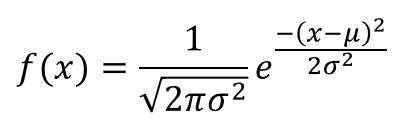


In [16]:
class NaiveBayesGaussiano:
    
    def __init__(self):
        self.prioris = None
        self.medias = None
        self.desvios = None
        self.posterioris = None

    def probs_priori(self, target):
        rotulos, r_freq = np.unique(target, return_counts=True)
        prioris = r_freq / len(target)
        probs_priori = dict(zip(rotulos, prioris))
        return probs_priori

    def treino(self, amostras, target):
        self.prioris = self.probs_priori(target)
        rotulos = np.unique(target)
        medias = {}
        desviosP = {}
        for r in rotulos:
            amostras_r = amostras[target == r]
            media_r = np.mean(amostras_r, axis=0)
            medias[r] = media_r
            std_r = np.std(amostras_r, axis=0)
            desviosP[r] = std_r
        self.medias = medias
        self.desvios = desviosP

    #Colocar rotulooo como parâmetro
    def fdp_gaussiana(self, amostras, rotulo):
        fdp = (1 / (np.sqrt(2 * np.pi) * self.desvios[rotulo])) * np.exp(
            -((amostras - self.medias[rotulo]) ** 2 / (2 * self.desvios[rotulo] ** 2))
        )
        return fdp

    def predicao(self, amostras):
        n = len(amostras)
        rotulos = list(self.medias.keys())
        target_hat = []
        dic_prob_rotulo = {}
        for r in rotulos:
            fdp = self.fdp_gaussiana(amostras, r).sum(axis=1)
            prob_rotulo = np.log(self.prioris[r]) + np.log(fdp)
            dic_prob_rotulo[r] = prob_rotulo
        df_prob = pd.DataFrame(dic_prob_rotulo)
        df_prob_exp = np.exp(df_prob)
        df_prob_norm = df_prob_exp.div(df_prob_exp.sum(axis=1), axis=0)
        self.posterioris =  df_prob_norm
        target_hat = df_prob.idxmax(axis=1)
        return target_hat
    

#### Teste utilizando dataset Iris
https://www.kaggle.com/datasets/saurabh00007/iriscsv?select=Iris.csv

In [17]:
data = pd.read_csv('Iris.csv')
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


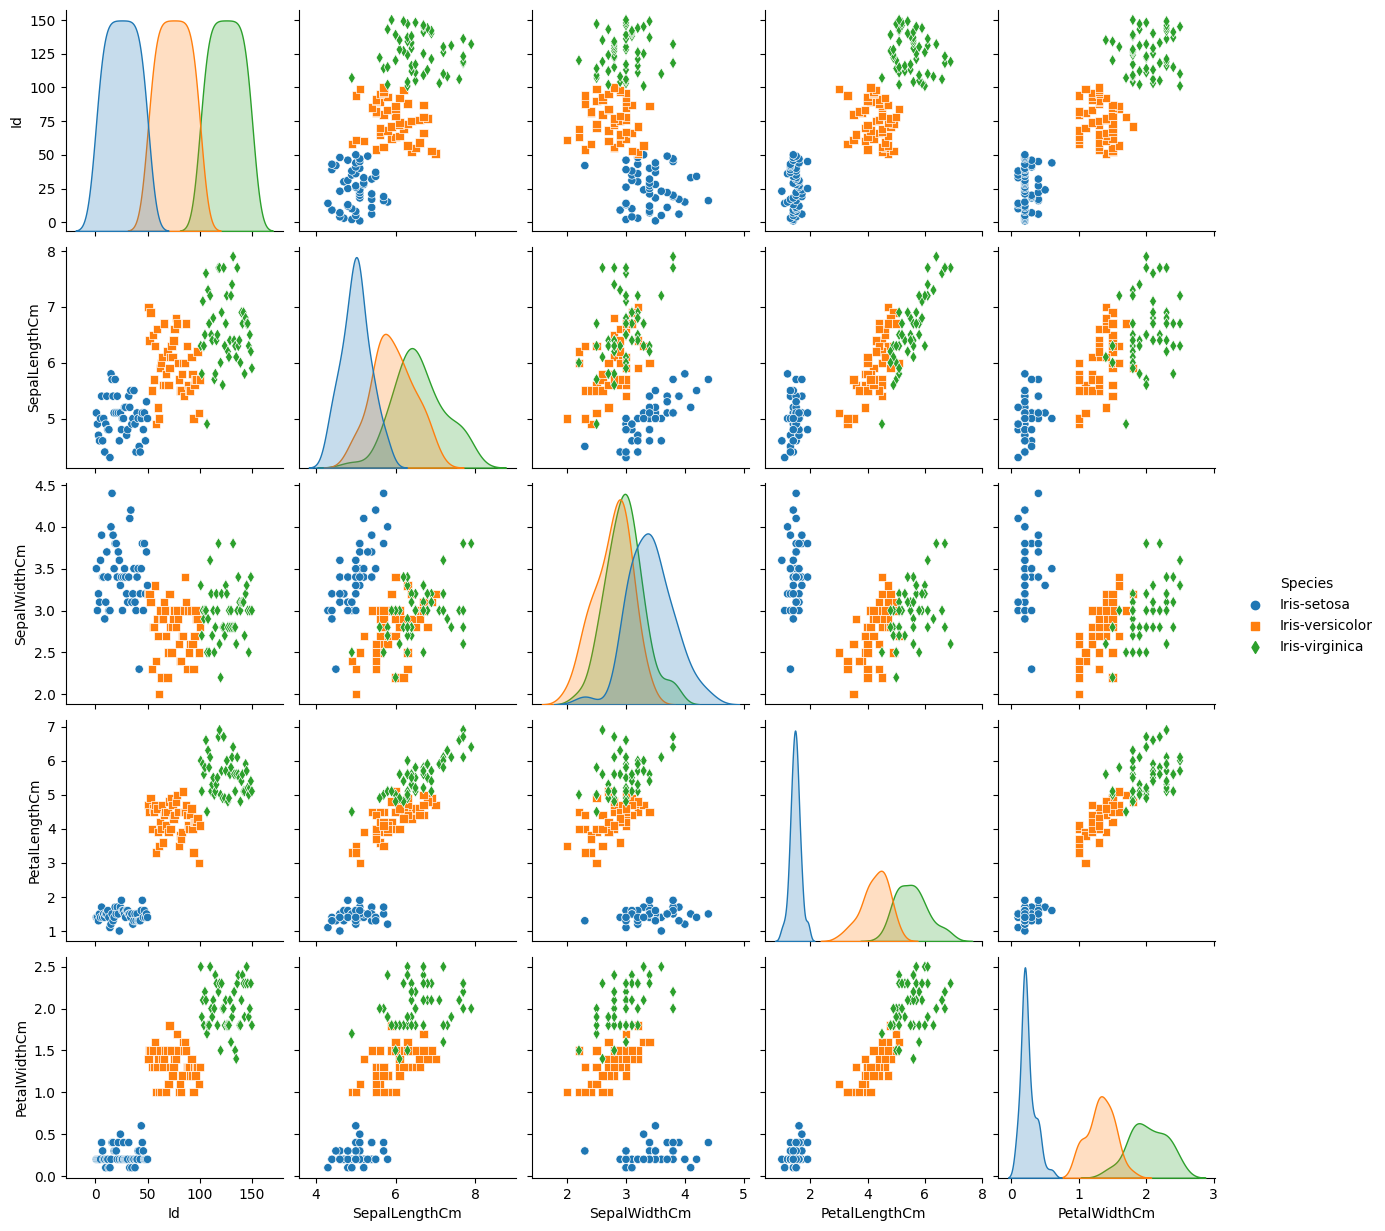

In [18]:
#Visualizando os dados
sns.pairplot(data= data,hue='Species', markers=['o','s','d'])

In [19]:
#Cria classificador
classificador =  NaiveBayesGaussiano()

In [20]:
#Treinando o modelo (definindo média e desvio padrão de cada característica para cada classe e definindo prioris de cada classe)
classificador.treino(data.drop(['Id','Species'], axis=1), data['Species'])

In [21]:
#Como o dataset é equilibrado divide prioris igualmente entre as classes
classificador.prioris

{'Iris-setosa': 0.3333333333333333,
 'Iris-versicolor': 0.3333333333333333,
 'Iris-virginica': 0.3333333333333333}

In [22]:
classificador.desvios

{'Iris-setosa': SepalLengthCm    0.348947
 SepalWidthCm     0.377195
 PetalLengthCm    0.171767
 PetalWidthCm     0.106132
 dtype: float64,
 'Iris-versicolor': SepalLengthCm    0.510983
 SepalWidthCm     0.310644
 PetalLengthCm    0.465188
 PetalWidthCm     0.195765
 dtype: float64,
 'Iris-virginica': SepalLengthCm    0.629489
 SepalWidthCm     0.319255
 PetalLengthCm    0.546348
 PetalWidthCm     0.271890
 dtype: float64}

In [23]:
classificador.medias

{'Iris-setosa': SepalLengthCm    5.006
 SepalWidthCm     3.418
 PetalLengthCm    1.464
 PetalWidthCm     0.244
 dtype: float64,
 'Iris-versicolor': SepalLengthCm    5.936
 SepalWidthCm     2.770
 PetalLengthCm    4.260
 PetalWidthCm     1.326
 dtype: float64,
 'Iris-virginica': SepalLengthCm    6.588
 SepalWidthCm     2.974
 PetalLengthCm    5.552
 PetalWidthCm     2.026
 dtype: float64}

In [24]:
#Modelo realiza predições 
predicoes =  classificador.predicao(data.drop(['Id','Species'], axis=1))

In [25]:
print(classification_report(data['Species'], predicoes))

                 precision    recall  f1-score   support

    Iris-setosa       0.98      1.00      0.99        50
Iris-versicolor       0.92      0.94      0.93        50
 Iris-virginica       0.96      0.92      0.94        50

       accuracy                           0.95       150
      macro avg       0.95      0.95      0.95       150
   weighted avg       0.95      0.95      0.95       150



In [26]:
classificador.posterioris

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.923037,0.034051,0.042912
1,0.756827,0.111891,0.131282
2,0.813267,0.065921,0.120812
3,0.786126,0.084379,0.129495
4,0.951668,0.022495,0.025837
...,...,...,...
145,0.108795,0.255275,0.635930
146,0.012276,0.385560,0.602164
147,0.095142,0.252228,0.652630
148,0.231765,0.194652,0.573583
